### **Load libraries**

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import risk_kit as rk
import importlib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### **Load data**

In [4]:
rets = pd.read_csv('selected_stocks_rets.csv', index_col=0)
stocks = pd.read_csv('selected_stocks_stocks.csv', index_col=0)

### **Initial examination**

In [5]:
summary_stats = rk.summary_stats(rets)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
BCOLOMBIA.CL,0.032339,0.158701,0.710547,4.929819,0.060200,0.077796,0.014157,-0.312086
CEMARGOS.CL,0.140348,0.205823,2.042847,12.919130,0.034038,0.088087,0.521616,-0.245765
CONCONCRET.CL,0.031918,0.197014,1.978381,11.394958,0.043613,0.080848,0.009261,-0.304041
CORFICOLCF.CL,0.008638,0.185886,0.818574,4.951597,0.070869,0.093811,-0.112060,-0.360412
ENKA.CL,-0.066910,0.160330,-0.071754,6.554222,0.078418,0.112995,-0.588407,-0.489441
ETB.CL,-0.047186,0.232252,1.048988,7.518866,0.084631,0.130881,-0.323681,-0.512000
EXITO.CL,-0.047732,0.187068,1.467941,14.883512,0.053812,0.120473,-0.404588,-0.533867
GRUPOAVAL.CL,-0.015464,0.143983,-0.076040,3.671189,0.069128,0.093744,-0.307475,-0.226015
GRUPOSURA.CL,-0.010695,0.226565,1.312711,12.171449,0.067788,0.122352,-0.175064,-0.346915
HCOLSEL.CL,0.022761,0.075054,0.346609,3.927998,0.030938,0.042926,-0.093969,-0.177608


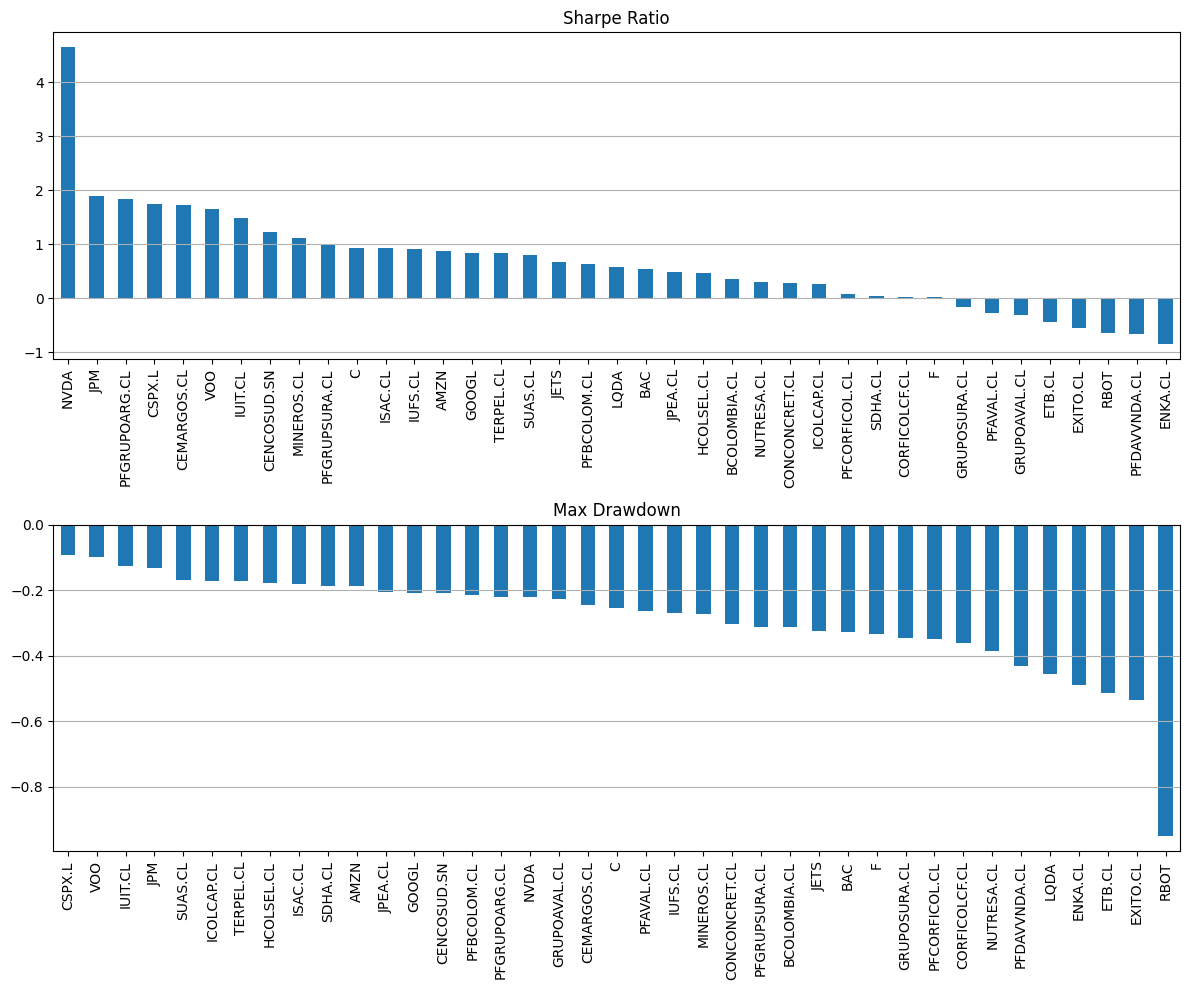

In [6]:
# Plot some return, volatility, and risk rankings to get a view of relevant stocks
periods_per_year = 54   # Define periods_per_year accordingly (Typically 54 for weekly and 12 for monthly)
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year)
#plot1_series = summary_stats['Annualized Return'].sort_values(ascending=False)
#plot2_series = summary_stats['Annualized Volatility'].sort_values(ascending=True)
#plot1_series = summary_stats['Cornish-Fisher VaR (5%)'].sort_values(ascending=False)
#plot2_series = summary_stats['Historic CVaR (5%)'].sort_values(ascending=False)
plot1_series = summary_stats['Sharpe Ratio'].sort_values(ascending=False)
plot2_series = summary_stats['Max Drawdown'].sort_values(ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plot1_series.plot.bar(ax = axes[0], legend=False, title=plot1_series.name)
plot2_series.plot.bar(ax=axes[1], legend=False, title=plot2_series.name)
axes[0].grid(axis='y')
axes[1].grid(axis='y')
plt.tight_layout()

In [7]:
# Identify stock pairs with very high correlation

# Generate correlation matrix
corr_mat = rets.corr()
# Generate a mask to exclude  duplicated pairs
#mask = np.triu(np.ones_like(corr_mat))
#corr_mat = corr_mat*mask
# Convert the matrix into a dataframe structured as a list of pairs with their respective correlations
stack_corr = pd.DataFrame(corr_mat.stack())
stack_corr = stack_corr[stack_corr[0] < 1]
stack_corr = stack_corr[stack_corr[0] != 0]
stack_corr.index.names = ['Stock 1', 'Stock 2']
stack_corr.reset_index(inplace=True)
#(abs(stack_corr[0]) > .7).sum()

# Filter to visualize only the pairs with very high correlations
high_corrs = stack_corr[stack_corr[0] >= 0.8].sort_values(by=0, ascending=False)
high_corrs

,Stock 1,Stock 2,0
949,CSPX.L,VOO,0.937590
1468,VOO,CSPX.L,0.937590
829,BAC,JPM,0.808511
1237,JPM,BAC,0.808511


In [8]:
# Check the average correlation coefficient of each stock
stack_corr.groupby('Stock 1')[0].mean().sort_values(ascending=False)

Stock 1
C                0.244414
CSPX.L           0.237130
VOO              0.226442
JPM              0.224811
ICOLCAP.CL       0.224366
BAC              0.212378
PFBCOLOM.CL      0.208372
JETS             0.201707
F                0.195182
PFGRUPSURA.CL    0.188450
HCOLSEL.CL       0.178411
PFDAVVNDA.CL     0.172947
BCOLOMBIA.CL     0.167300
PFCORFICOL.CL    0.160867
CORFICOLCF.CL    0.151299
PFGRUPOARG.CL    0.142309
GRUPOSURA.CL     0.127081
PFAVAL.CL        0.124108
RBOT             0.123029
AMZN             0.106209
NVDA             0.099495
GRUPOAVAL.CL     0.095528
GOOGL            0.093262
CONCONCRET.CL    0.092163
MINEROS.CL       0.091444
IUIT.CL          0.091303
IUFS.CL          0.082830
SUAS.CL          0.082100
CEMARGOS.CL      0.080085
ISAC.CL          0.069136
TERPEL.CL        0.067568
ENKA.CL          0.062790
ETB.CL           0.060468
LQDA             0.041567
CENCOSUD.SN      0.021014
JPEA.CL          0.019235
EXITO.CL         0.017156
SDHA.CL         -0.012487
NUTR

In [9]:
# Based on high correlation coefficients, especially with some specific stocks, decided to remove the following stocks
# CSPX.L
# C
# ICOLCAP.CL
rets = rets.drop(['CSPX.L', 'BAC'], axis='columns')

### **Identify Combination with the maximum Sharpe-Ratio**

In [10]:
rf_rate = .12   # Currently, Nubank is offering a safe return of 12% annually, this will be the risk-free-rate

weights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])
optimal_allocation = optimal_allocation[optimal_allocation['Weights'] > 0]
optimal_allocation

,Weights
BCOLOMBIA.CL,0.0117
CEMARGOS.CL,0.1208
MINEROS.CL,0.0621
NUTRESA.CL,0.0488
PFGRUPOARG.CL,0.0842
TERPEL.CL,0.0583
CENCOSUD.SN,0.0974
IUFS.CL,0.1294
JPM,0.0373
NVDA,0.3500


<Axes: xlabel='Date'>

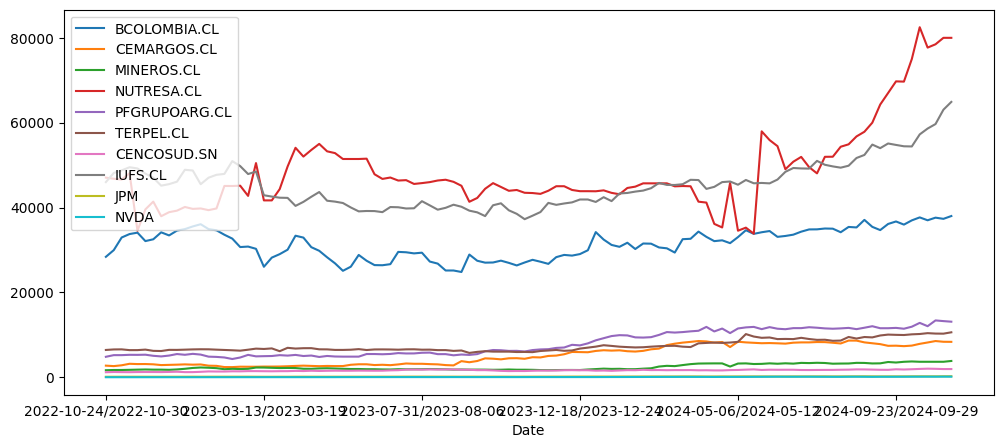

In [11]:
stocks[optimal_allocation.index].plot(figsize=(12, 5))

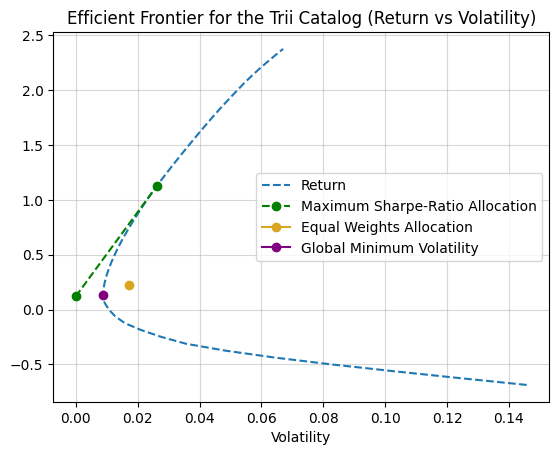

In [12]:
rk.plot_ef(50, style = '--', show_cml=True, show_ew=True, show_gmv=True, riskfree_rate=rf_rate,
           return_series=rets, periods_per_year=periods_per_year)
plt.title('Efficient Frontier for the Trii Catalog (Return vs Volatility)')
plt.grid(alpha=.5)

### **Create an index for the chosen allocation**

In [13]:
# Reduce the portfolio stocks to only those for which shares of over 3% is recommended
chosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .03]
chosen_allocation = chosen_allocation / chosen_allocation.sum()
chosen_allocation

,Weights
CEMARGOS.CL,0.122230
MINEROS.CL,0.062835
NUTRESA.CL,0.049378
PFGRUPOARG.CL,0.085197
TERPEL.CL,0.058990
CENCOSUD.SN,0.098553
IUFS.CL,0.130932
JPM,0.037742
NVDA,0.354143


In [14]:
# Generate a dataframe to represent the evolution of the allocation in each stock
weights = chosen_allocation['Weights']
allocated_index = (rets[weights.index] + 1).cumprod()*weights

# Add a column to represent the index
allocated_index['index'] = allocated_index.sum(axis='columns')
allocated_index.index = pd.to_datetime(allocated_index.index.str.split('/').str[0])

# Generate a row to represent an earlier period before returns are made,
# corresponding to the time when the index equal 1
first_period = allocated_index.index[0]
starting_period = first_period - pd.offsets.Week(weekday=6)   # Uncomment to generate a week starting period
#starting_period = first_period - pd.offsets.DateOffset(months=1)   # Uncomment to generate a month starting period
starting_period

allocation_start = pd.DataFrame(index=[starting_period], columns=allocated_index.columns)
allocation_start.iloc[:, :-1] = 1*weights
allocation_start['index'] = 1

# Append the row to the allocated_index dataframe
allocated_index = pd.concat([allocation_start, allocated_index], axis='rows')
allocated_index.head()

,CEMARGOS.CL,MINEROS.CL,NUTRESA.CL,PFGRUPOARG.CL,TERPEL.CL,CENCOSUD.SN,IUFS.CL,JPM,NVDA,index
2022-10-23,0.12223,0.062835,0.049378,0.085197,0.05899,0.098553,0.130932,0.037742,0.354143,1.000000
2022-10-24,0.130905,0.060722,0.045555,0.088189,0.057764,0.104476,0.139969,0.03893,0.393007,1.059517
2022-10-31,0.125779,0.062471,0.045299,0.095276,0.058846,0.109412,0.146511,0.040351,0.402154,1.086098
2022-11-07,0.134847,0.062653,0.04512,0.095276,0.059026,0.106944,0.148367,0.041777,0.46383,1.157841
2022-11-14,0.151802,0.064037,0.046566,0.096693,0.057404,0.10571,0.150619,0.041326,0.43775,1.151907


In [15]:
# Generate a dataframe with the returns of the index
allocated_index_returns = (allocated_index/allocated_index.shift(1) - 1).dropna()
allocated_index_returns.head()

,CEMARGOS.CL,MINEROS.CL,NUTRESA.CL,PFGRUPOARG.CL,TERPEL.CL,CENCOSUD.SN,IUFS.CL,JPM,NVDA,index
2022-10-24,0.070968,-0.033623,-0.077427,0.03512,-0.020782,0.0601,0.069022,0.031498,0.109738,0.059517
2022-10-31,-0.039157,0.028794,-0.005608,0.080357,0.018727,0.047244,0.046739,0.036485,0.023276,0.025088
2022-11-07,0.0721,0.002915,-0.003947,0.0,0.003064,-0.022556,0.012669,0.035354,0.153363,0.066055
2022-11-14,0.125731,0.022093,0.032038,0.014876,-0.027489,-0.011538,0.015176,-0.010791,-0.056226,-0.005124
2022-11-21,-0.021039,0.023891,-0.282051,-0.002443,0.000605,0.022646,-0.005859,0.021668,0.055877,0.010303


In [16]:
summary_stats = rk.summary_stats(allocated_index_returns, periods_per_year=allocated_index_returns.shape[0])
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
CEMARGOS.CL,2.260890,0.617470,2.042847,12.919130,0.034038,0.088087,3.509102,-0.245765
MINEROS.CL,1.229109,0.570639,0.900558,10.992180,0.057652,0.093246,2.040778,-0.272388
NUTRESA.CL,0.568620,0.993183,3.536177,29.850573,-0.021200,0.167886,0.526536,-0.384842
PFGRUPOARG.CL,1.807395,0.480569,0.279827,3.198079,0.061476,0.080463,3.592176,-0.220096
TERPEL.CL,0.612061,0.397198,1.974103,12.489922,0.026175,0.061328,1.423140,-0.172727
CENCOSUD.SN,0.729267,0.320936,-0.047584,2.986192,0.045662,0.060111,2.116039,-0.209088
IUFS.CL,0.508250,0.296466,-0.459594,5.027934,0.045148,0.059672,1.566641,-0.268695
JPM,1.116131,0.307322,-0.346998,3.440472,0.043827,0.061542,3.432465,-0.130516
NVDA,10.399793,0.693268,0.381484,3.539582,0.076648,0.103264,14.531599,-0.220212
index,4.435308,0.436366,0.150409,3.957010,0.049778,0.072845,9.806575,-0.155133


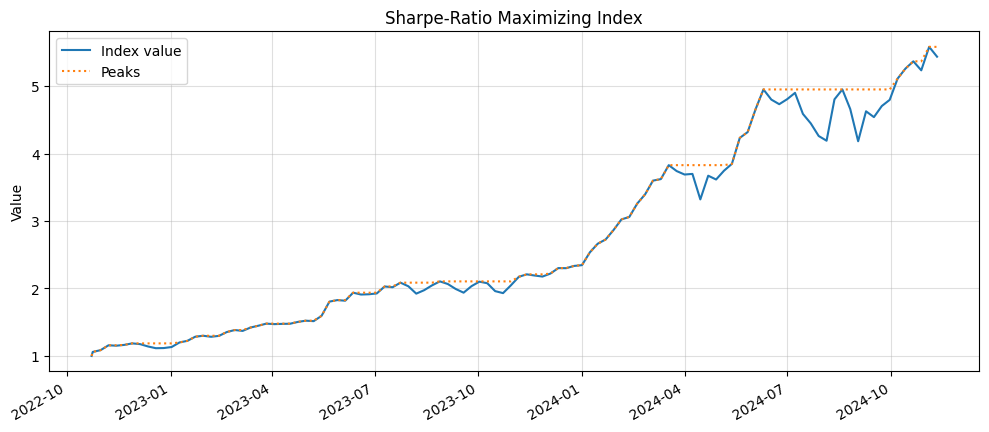

In [17]:
# Visualize the evolution of the index
allocated_index['index'].plot(figsize=(12, 5), label='Index value')
allocated_index['index'].cummax().plot(linestyle=':', label='Peaks')
plt.legend()
plt.ylabel('Value')
plt.title('Sharpe-Ratio Maximizing Index')
plt.grid(alpha=0.4)

### **Export datasets and an index for the Sharpe-Ratio maximizing allocation**

In [18]:
# Allocation index and returns
allocated_index.to_csv('allocated_index.csv')
allocated_index_returns.to_csv('allocated_index_returns.csv')